In [ ]:
import numpy as np

from keras import models
from keras import layers 

from keras import optimizers
from keras import losses
from keras import metrics

import matplotlib
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets import imdb

(train_data, train_lables ), (test_data, test_labels) = imdb.load_data(num_words = 10000)


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]]
)
print (decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [ ]:
def vectorize_sequences (sequences, dim = 10000):
  results = np.zeros((len(sequences), dim))
  for i, seq in enumerate (sequences):
    results[i, seq] = 1
  return results


In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences (test_data)

y_train = np.asarray(train_lables).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 161,105
Trainable params: 161,105
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_val = x_train[:10000]
y_val = y_train[:10000]

partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]


In [ ]:
x_val[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
#model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.mse,
              metrics=[metrics.binary_accuracy]
              )


In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val,y_val)
                    )

Epoch 1/20
30/30 [==============================] - 3s 74ms/step - loss: 0.2103 - binary_accuracy: 0.6834 - val_loss: 0.1216 - val_binary_accuracy: 0.8631
Epoch 2/20
30/30 [==============================] - 1s 47ms/step - loss: 0.0978 - binary_accuracy: 0.9002 - val_loss: 0.0927 - val_binary_accuracy: 0.8828
Epoch 3/20
30/30 [==============================] - 1s 47ms/step - loss: 0.0616 - binary_accuracy: 0.9322 - val_loss: 0.0847 - val_binary_accuracy: 0.8880
Epoch 4/20
30/30 [==============================] - 1s 48ms/step - loss: 0.0450 - binary_accuracy: 0.9497 - val_loss: 0.0856 - val_binary_accuracy: 0.8842
Epoch 5/20
30/30 [==============================] - 1s 47ms/step - loss: 0.0312 - binary_accuracy: 0.9678 - val_loss: 0.1011 - val_binary_accuracy: 0.8635
Epoch 6/20
30/30 [==============================] - 1s 47ms/step - loss: 0.0274 - binary_accuracy: 0.9708 - val_loss: 0.0885 - val_binary_accuracy: 0.8840
Epoch 7/20
30/30 [==============================] - 1s 47ms/step - los

In [ ]:
history.history.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

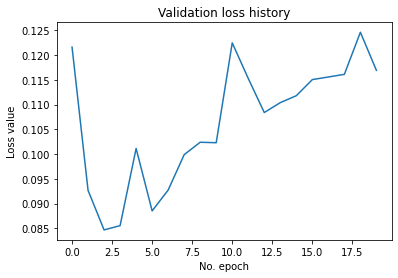

In [ ]:
# Plot history: Validation loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

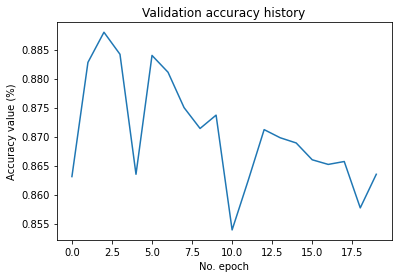

In [ ]:
# Plot history: Accuracy
plt.plot(history.history['val_binary_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

In [ ]:
results = model.evaluate(x_test, y_test)


782/782 [==============================] - 2s 3ms/step - loss: 0.1282 - binary_accuracy: 0.8519


In [ ]:
model.predict(x_test)

array([[0.01241204],
       [0.9999994 ],
       [0.78471696],
       ...,
       [0.01630494],
       [0.01969096],
       [0.66062534]], dtype=float32)

In [ ]:
import math

In [ ]:
text_len = [len(x_train[i]) for i in range(len(x_train))]

print(" Average length of review in training dataset", np.mean(text_len))
print(" Std Deviation  of review in training dataset", np.std(text_len))
#plt.boxplot(text_len)
#plt.show()

 Average length of review in training dataset 10000.0
 Std Deviation  of review in training dataset 0.0


In [ ]:
#we want to reviev be seme length

from keras.preprocessing.sequence import pad_sequences

pad_x_train = pad_sequences(x_train,maxlen=5000,padding='post' )
pad_x_test = pad_sequences(x_test, maxlen=5000, padding='post')

In [ ]:
X_val = pad_x_train[:10000]
Y_val = y_train[:10000]

X_train = pad_x_train[10000:]
Y_train = y_train[10000:]

In [ ]:
from keras import Sequential
from keras.layers import Embedding, Dense, LSTM, Dropout

In [ ]:
model2 = models.Sequential()
model2.add(Embedding(input_dim=10000, output_dim=64, input_length=5000))
model2.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 5000, 64)          640000    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 673,089
Trainable params: 673,089
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model2.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.mse,
              metrics=[metrics.binary_accuracy]
              )

In [ ]:
history2 = model2.fit(X_train, 
                  Y_train, 
                  batch_size=32, 
                  epochs=5, 
                  validation_data=(X_val, Y_val))

Epoch 1/5
 55/469 [==>...........................] - ETA: 1:12:30 - loss: 0.2504 - binary_accuracy: 0.4882

In [ ]:
results2 = model2.evaluate(pad_x_test, y_test)